# Analyse exploratoire des données

**Jeu de données** : [Pokémon - Qui appartient à la *Team Rocket* ?](https://www.kaggle.com/datasets/kotsop/pokmon-detective-challenge)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from src.utils import add_count_labels

In [3]:
df = pd.read_csv(
    "./data/candidate_datasets/pokemon_team_rocket_dataset/pokemon_team_rocket_dataset.csv",
    index_col="ID",
)

## Bilan des informations

- **Description élémentaire du tableau individus-variables**:
  - **Nombre d'individus** : 5000
  - **Nombre de variables** : 17
    - 3 variables binaires (`Is Pokemon Champion`, `Rare Item Holder`, `Team Rocket`)
    - 7 variables numériques entières (`Age`, `Average Pokemon Level`, `Criminal Record`, `Win Ratio`, `Number of Gym Badges`, `Number of Migrations`, `Debt to Kanto`)
      - La variable `Criminal Record` est binarisable.
    - 7 variables catégorielles (`City`, `Economic Status`, `Profession`, `Most Used Pokemon Type`, `PokéBall Usage`, `Battle Strategy`, `Team Rocket`)
      - La variable `Team Rocket` peut être binarisée.
  - **Nombre de valeurs manquantes** : 0
    - Les 1000 derniers individus n'ont pas de valeur pour la variable `Team Rocket`. Il s'agit de l'échantillon de test.
  - **Variable d'intérêt** : `Team Rocket`
- **Étude de fond** :
  - Variable d'intérêt (`Team Rocket`) :
    - 720 individus de la *Team Rocket* (18%)
    - 4280 individus non membres de la *Team Rocket* (82%)
  - **Variables explicatives**:
    - **Variables quantitatives**
    - **Variables qualitatives**
    - **Variables binaires**
    - **Variables explicatives en fonction de la variable d'intérêt**
      - **Variables quantitatives** :
        - *A priori*, les membre de la *Team Rocket* gagnent plus souvent et migrent plus que les autres.
        - Si la dette envers Kanto est supérieure à 120 000, il est presque certain que l'individu est membre de la *Team Rocket*.
      - **Variables qualitatives** :
        - Rien de significatif.
      - **Variables binaires** :
        - Tout non-membre de la *Team Rocket* n'a pas de casier judiciaire. Ainsi tout membre de la *Team Rocket* a un casier judiciaire. 
        - Tout non-membre de la *Team Rocket* n'est pas un champion Pokémon. Ainsi tout champion Pokémon est membre de la *Team Rocket*.
        - Tout non-membre de la *Team Rocket* a fait acte de charité. Ainsi toute personne n'ayant pas fait acte de charité est membre de la *Team Rocket*.
        - Tout non-membre de la *Team Rocket* n'a pas d'objet rare. Ainsi tout personne ayant un objet rare est membre de la *Team Rocket*.


## Description élémentaire du tableau individus-variables

### Forme du tableau

In [4]:
print(f"{df.shape[0]} individus et {df.shape[1]} variables.")

5000 individus et 17 variables.


### Première lignes

In [5]:
display(df.head(n=20))

,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,PokéBall Usage,Win Ratio,Number of Gym Badges,Is Pokemon Champion,Battle Strategy,Number of Migrations,Rare Item Holder,Debt to Kanto,Charity Participation,Team Rocket
ID,,,,,,,,,,,,,,,,,
0,27,Pewter City,Middle,Fisherman,Rock,50,0,DuskBall,51,1,False,Unpredictable,25,False,24511,True,No
1,55,Viridian City,Middle,PokéMart Seller,Grass,35,1,HealBall,53,2,False,Unpredictable,19,False,177516,True,Yes
2,14,Pallet Town,High,Police Officer,Poison,96,0,NetBall,76,5,False,Aggressive,18,False,85695,True,No
3,41,Cerulean City,Middle,Gym Leader Assistant,Dragon,23,0,UltraBall,27,0,False,Defensive,10,False,39739,True,No
4,15,Pallet Town,Middle,Gym Leader Assistant,Ground,16,1,HealBall,51,1,False,Aggressive,17,True,126923,False,Yes
5,41,Lavender Town,High,Daycare Worker,Ground,87,0,TimerBall,53,2,False,Aggressive,18,True,309636,False,Yes
6,21,Celadon City,Low,PokéMart Seller,Ghost,58,0,MasterBall,52,0,False,Unpredictable,8,False,75034,True,No
7,25,Lavender Town,Middle,Gym Leader Assistant,Bug,84,0,LuxuryBall,35,0,False,Defensive,25,False,65407,True,No
8,40,Saffron City,Middle,Gym Leader Assistant,Fighting,73,0,DarkBall,44,0,False,Aggressive,6,False,33398,True,No


### Nature des variables

#### Type des variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     5000 non-null   int64 
 1   City                    5000 non-null   object
 2   Economic Status         5000 non-null   object
 3   Profession              5000 non-null   object
 4   Most Used Pokemon Type  5000 non-null   object
 5   Average Pokemon Level   5000 non-null   int64 
 6   Criminal Record         5000 non-null   int64 
 7   PokéBall Usage          5000 non-null   object
 8   Win Ratio               5000 non-null   int64 
 9   Number of Gym Badges    5000 non-null   int64 
 10  Is Pokemon Champion     5000 non-null   bool  
 11  Battle Strategy         5000 non-null   object
 12  Number of Migrations    5000 non-null   int64 
 13  Rare Item Holder        5000 non-null   bool  
 14  Debt to Kanto           5000 non-null   int64 
 15  Charity P

#### Variables qualitatives

In [7]:
qualitative_variables = df.select_dtypes(include=["object"]).columns

print(f"{len(qualitative_variables)} variables qualitatives : \n")
for variable in qualitative_variables:
    print(
        f"{variable} ({df[variable].nunique()} modalités) : \n\t{df[variable].unique()}"
    )

7 variables qualitatives : 

City (10 modalités) : 
	['Pewter City' 'Viridian City' 'Pallet Town' 'Cerulean City'
 'Lavender Town' 'Celadon City' 'Saffron City' 'Cinnabar Island'
 'Fuchsia City' 'Vermilion City']
Economic Status (3 modalités) : 
	['Middle' 'High' 'Low']
Profession (16 modalités) : 
	['Fisherman' 'PokéMart Seller' 'Police Officer' 'Gym Leader Assistant'
 'Daycare Worker' 'Casino Worker' 'Rocket Grunt' 'Breeder' 'Nurse'
 'Researcher' 'Elite Trainer' 'Scientist' 'Black Market Dealer' 'Champion'
 'Biker' 'Underground Battler']
Most Used Pokemon Type (18 modalités) : 
	['Rock' 'Grass' 'Poison' 'Dragon' 'Ground' 'Ghost' 'Bug' 'Fighting'
 'Electric' 'Flying' 'Ice' 'Psychic' 'Fire' 'Fairy' 'Water' 'Dark' 'Steel'
 'Normal']
PokéBall Usage (10 modalités) : 
	['DuskBall' 'HealBall' 'NetBall' 'UltraBall' 'TimerBall' 'MasterBall'
 'LuxuryBall' 'DarkBall' 'PokéBall' 'GreatBall']
Battle Strategy (3 modalités) : 
	['Unpredictable' 'Aggressive' 'Defensive']
Team Rocket (2 modalités) : 

#### Variables numériques

In [8]:
df.describe()

,Age,Average Pokemon Level,Criminal Record,Win Ratio,Number of Gym Badges,Number of Migrations,Debt to Kanto
count,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.30080,52.256400,0.08300,53.190800,2.231200,13.125600,75527.163400
std,17.46132,27.572209,0.27591,18.940563,1.987898,7.790684,76820.989625
min,10.00000,5.000000,0.00000,20.000000,0.000000,0.000000,37.000000
25%,25.00000,28.000000,0.00000,37.000000,1.000000,6.000000,29371.250000
50%,41.00000,52.500000,0.00000,53.000000,2.000000,13.000000,58224.000000
75%,55.00000,76.000000,0.00000,69.000000,4.000000,20.000000,86782.000000
max,70.00000,100.000000,1.00000,90.000000,8.000000,30.000000,399007.000000


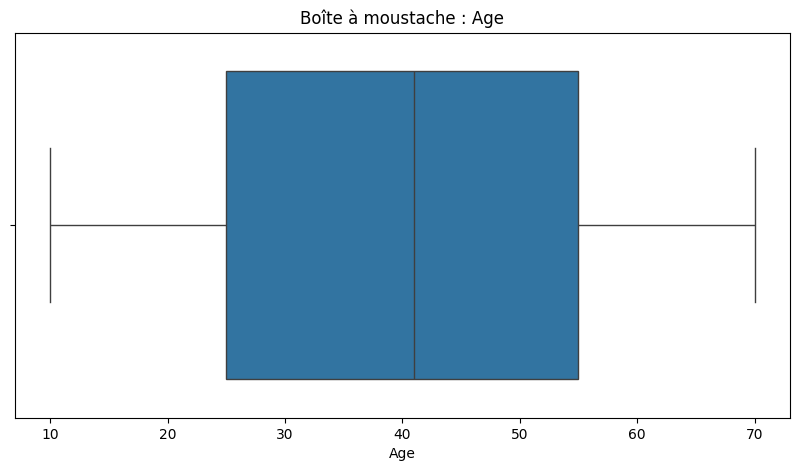

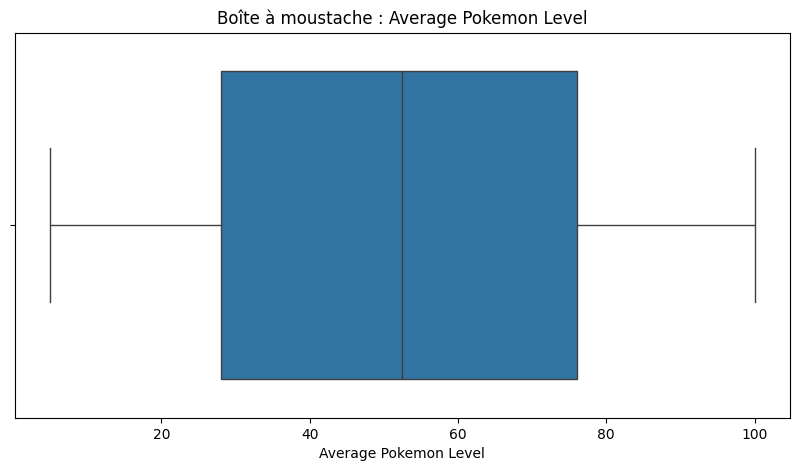

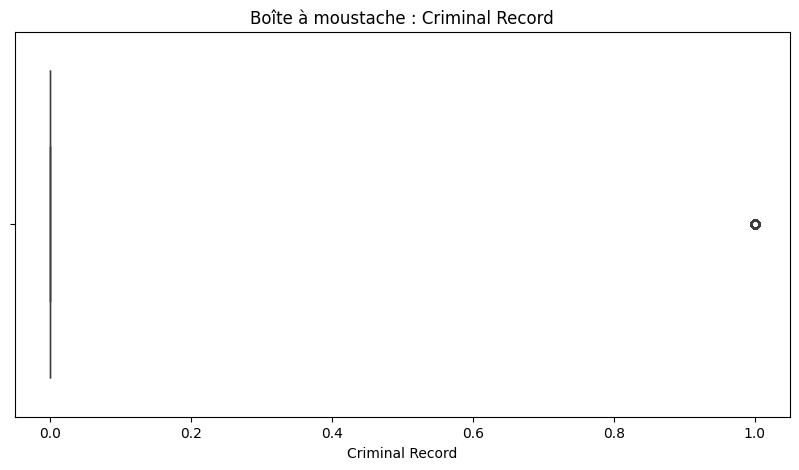

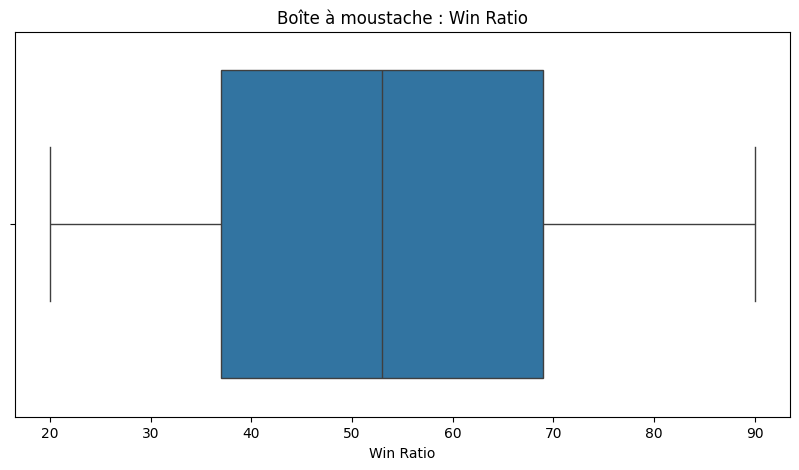

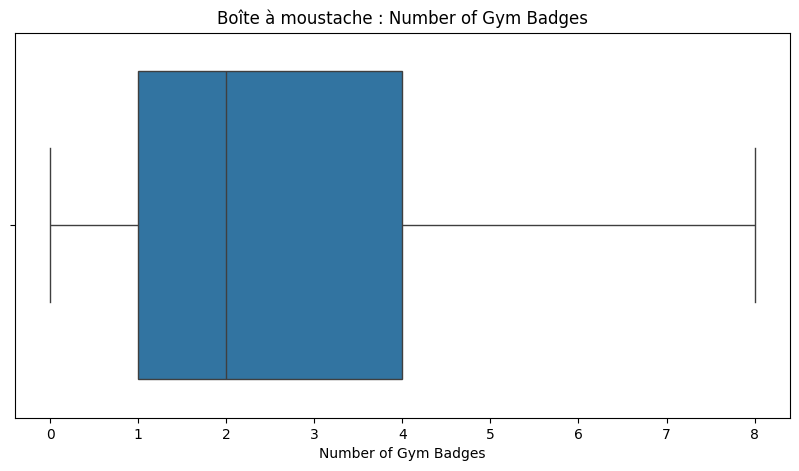

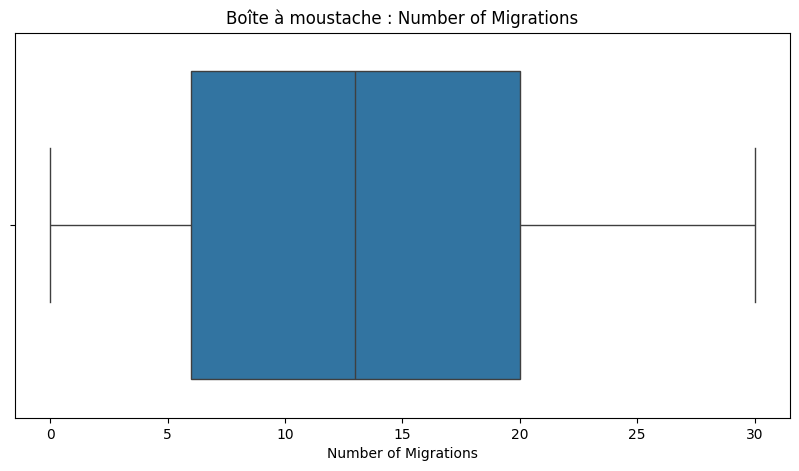

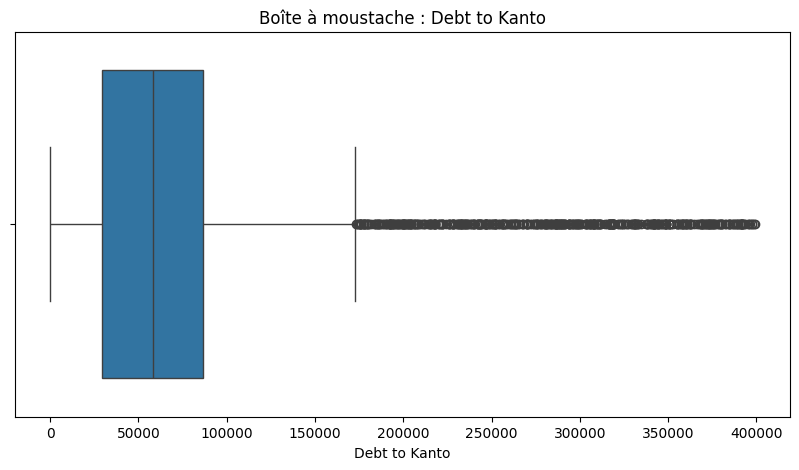

In [9]:
# Boîtes à moustaches
df_numeric = df.select_dtypes(include=[np.number])
for col in df_numeric.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boîte à moustache : {col}")
    plt.show()

### Valeurs manquantes

In [10]:
for column in df.columns:
    print(f"{column} : {df[column].isna().sum()} missing values")

Age : 0 missing values
City : 0 missing values
Economic Status : 0 missing values
Profession : 0 missing values
Most Used Pokemon Type : 0 missing values
Average Pokemon Level : 0 missing values
Criminal Record : 0 missing values
PokéBall Usage : 0 missing values
Win Ratio : 0 missing values
Number of Gym Badges : 0 missing values
Is Pokemon Champion : 0 missing values
Battle Strategy : 0 missing values
Number of Migrations : 0 missing values
Rare Item Holder : 0 missing values
Debt to Kanto : 0 missing values
Charity Participation : 0 missing values
Team Rocket : 1000 missing values


<Axes: ylabel='ID'>

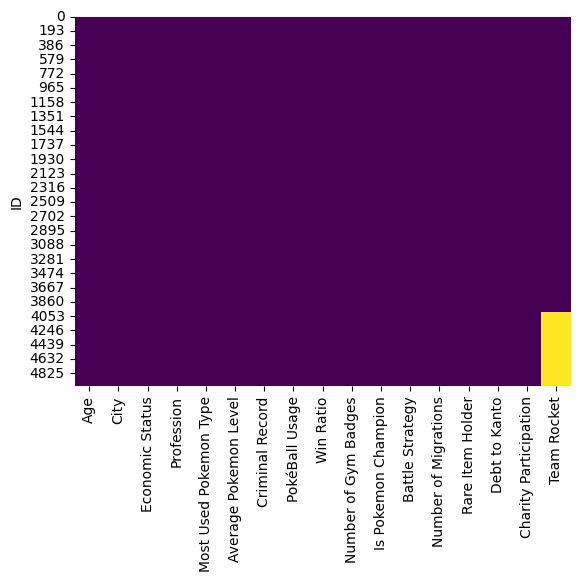

In [11]:
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
# Yellow = missing values, Purple = no missing values

Les 1000 dernières valeurs correspondent au jeu de test.

### Tableau complet

In [33]:
display(df)

,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,PokéBall Usage,Win Ratio,Number of Gym Badges,Is Pokemon Champion,Battle Strategy,Number of Migrations,Rare Item Holder,Debt to Kanto,Charity Participation,Team Rocket
ID,,,,,,,,,,,,,,,,,
0,27,Pewter City,Middle,Fisherman,Rock,50,False,DuskBall,51,1,False,Unpredictable,25,False,24511,True,False
1,55,Viridian City,Middle,PokéMart Seller,Grass,35,True,HealBall,53,2,False,Unpredictable,19,False,177516,True,True
2,14,Pallet Town,High,Police Officer,Poison,96,False,NetBall,76,5,False,Aggressive,18,False,85695,True,False
3,41,Cerulean City,Middle,Gym Leader Assistant,Dragon,23,False,UltraBall,27,0,False,Defensive,10,False,39739,True,False
4,15,Pallet Town,Middle,Gym Leader Assistant,Ground,16,True,HealBall,51,1,False,Aggressive,17,True,126923,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,36,Viridian City,Middle,Researcher,Rock,91,False,LuxuryBall,53,5,False,Defensive,5,False,70192,True,NaN
4996,17,Vermilion City,Middle,Gym Leader Assistant,Dragon,23,False,PokéBall,40,0,False,Defensive,1,False,43208,True,NaN
4997,67,Fuchsia City,High,Elite Trainer,Dark,13,False,UltraBall,36,0,False,Defensive,25,False,47794,True,NaN


## Pré-traitement

### Catégorisation des variables

In [12]:
object_columns = df.select_dtypes(include=["object"]).columns
print(f"Colonnes de type `object` : {list(object_columns)}")

Colonnes de type `object` : ['City', 'Economic Status', 'Profession', 'Most Used Pokemon Type', 'PokéBall Usage', 'Battle Strategy', 'Team Rocket']


In [13]:
for column in object_columns:
    df[column] = df[column].astype("category")

#### Cas des variables ordinales

Seule la variable `Economic Status` est ordinale. 

In [14]:
economic_statuses = ["Low", "Middle", "High"]
df["Economic Status"] = pd.Categorical(
    df["Economic Status"], categories=economic_statuses, ordered=True
)

#### Binarisation des variables

Les variable `Team Rocket` et `Criminal Record` sont binarisables.

In [15]:
df["Team Rocket"] = df["Team Rocket"].map({"Yes": 1, "No": 0})
df["Team Rocket"] = df["Team Rocket"].astype("bool")

In [16]:
df["Criminal Record"] = df["Criminal Record"].astype("bool")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     5000 non-null   int64   
 1   City                    5000 non-null   category
 2   Economic Status         5000 non-null   category
 3   Profession              5000 non-null   category
 4   Most Used Pokemon Type  5000 non-null   category
 5   Average Pokemon Level   5000 non-null   int64   
 6   Criminal Record         5000 non-null   bool    
 7   PokéBall Usage          5000 non-null   category
 8   Win Ratio               5000 non-null   int64   
 9   Number of Gym Badges    5000 non-null   int64   
 10  Is Pokemon Champion     5000 non-null   bool    
 11  Battle Strategy         5000 non-null   category
 12  Number of Migrations    5000 non-null   int64   
 13  Rare Item Holder        5000 non-null   bool    
 14  Debt to Kanto           5000 

In [18]:
df["Criminal Record"].unique()

array([False,  True])

### Scission des variables

Nous créeons deux sous-ensembles de variables en fonction de la présence ou non de la variable `Team Rocket`. Celles qui en possèdent une forment le jeu d'entraînement, les autres le jeu de test.

In [19]:
df_train = df[df["Team Rocket"].notna()]
df_test = df[df["Team Rocket"].isna()]

## Étude de fond

### Variable d'intérêt

C:\Users\Valentin\AppData\Local\Temp\ipykernel_7736\3680188173.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_train, x="Team Rocket", palette=["green", "purple"])


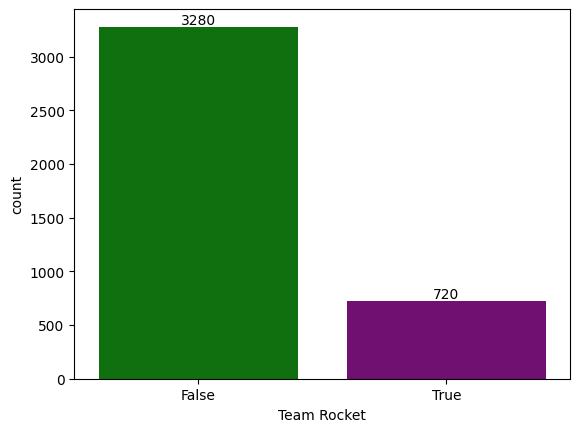

In [20]:
ax = sns.countplot(data=df_train, x="Team Rocket", palette=["green", "purple"])

# To add counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{int(height)}",
        (p.get_x() + p.get_width() / 2.0, height),
        ha="center",
        va="bottom",
    )

In [21]:
team_rocket_percentage = df_train["Team Rocket"].mean() * 100
print(f"Part des individus membre de la Team Rocket : {team_rocket_percentage}%")
print(
    f"Part des individus non membre de la Team Rocket : {100 - team_rocket_percentage}%"
)

Part des individus membre de la Team Rocket : 18.0%
Part des individus non membre de la Team Rocket : 82.0%


### Variables explicatives

#### Variables quantitatives

In [22]:
quantitative_variables = df.select_dtypes(include=["int64"]).columns

##### Histogrammes

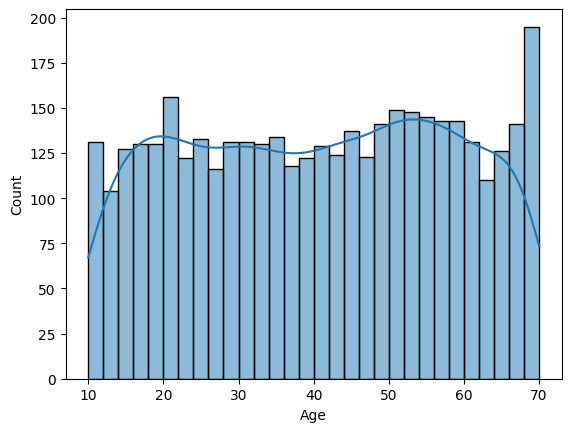

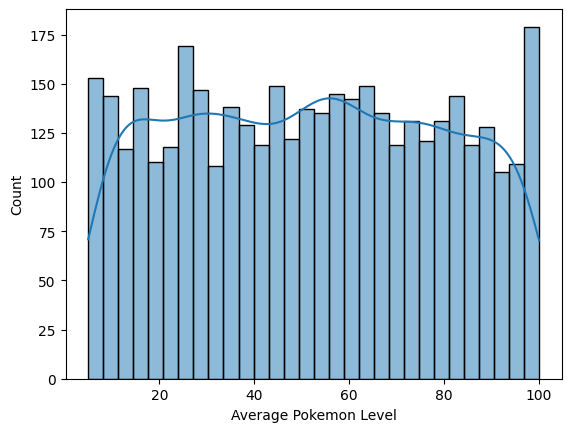

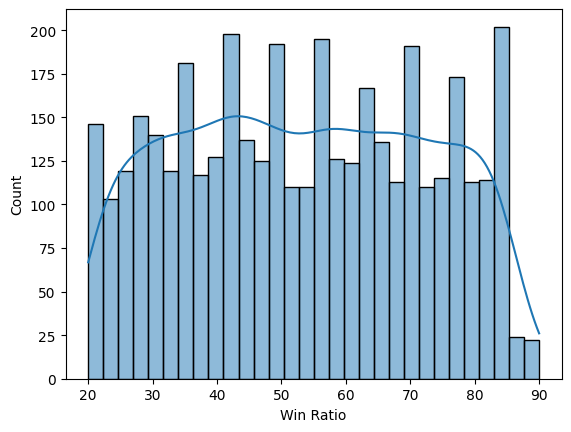

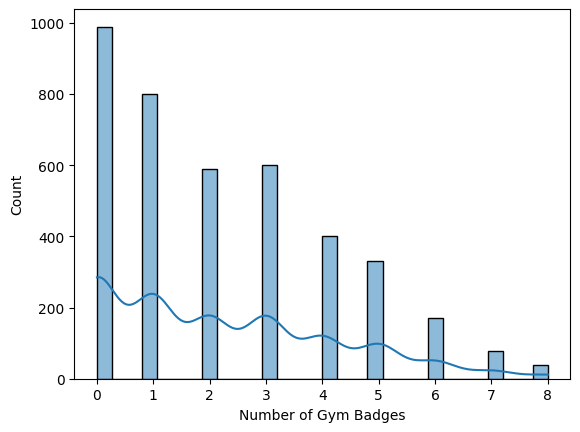

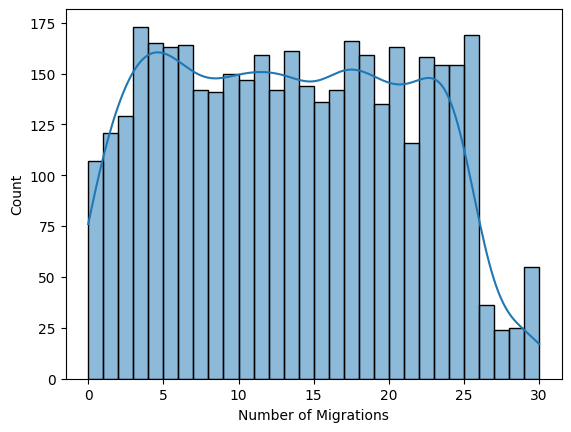

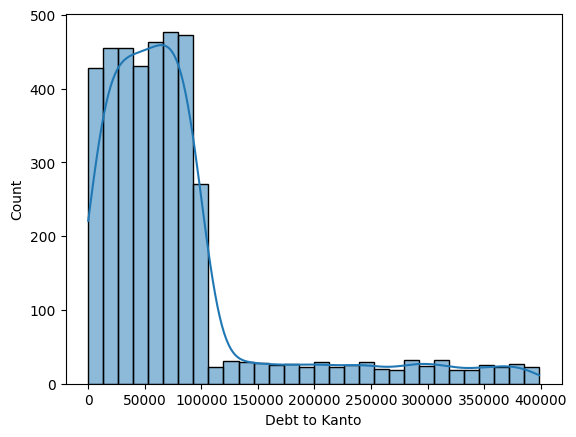

In [23]:
for column in quantitative_variables:
    plt.figure()
    sns.histplot(x=column, data=df_train, kde=True, bins=30)

*Remarque* : `Number of Gym Badges` doit être analysé avec un diagramme en barres au vu de son caractère discret.

##### Diagrammes en barres

<Axes: xlabel='Number of Gym Badges', ylabel='count'>

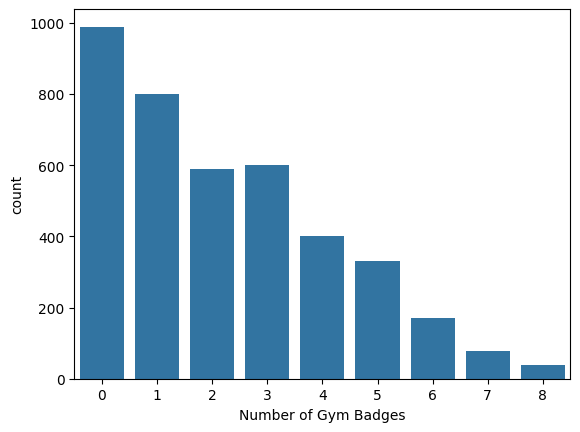

In [24]:
sns.countplot(data=df_train, x="Number of Gym Badges")

#### Variables qualitatives

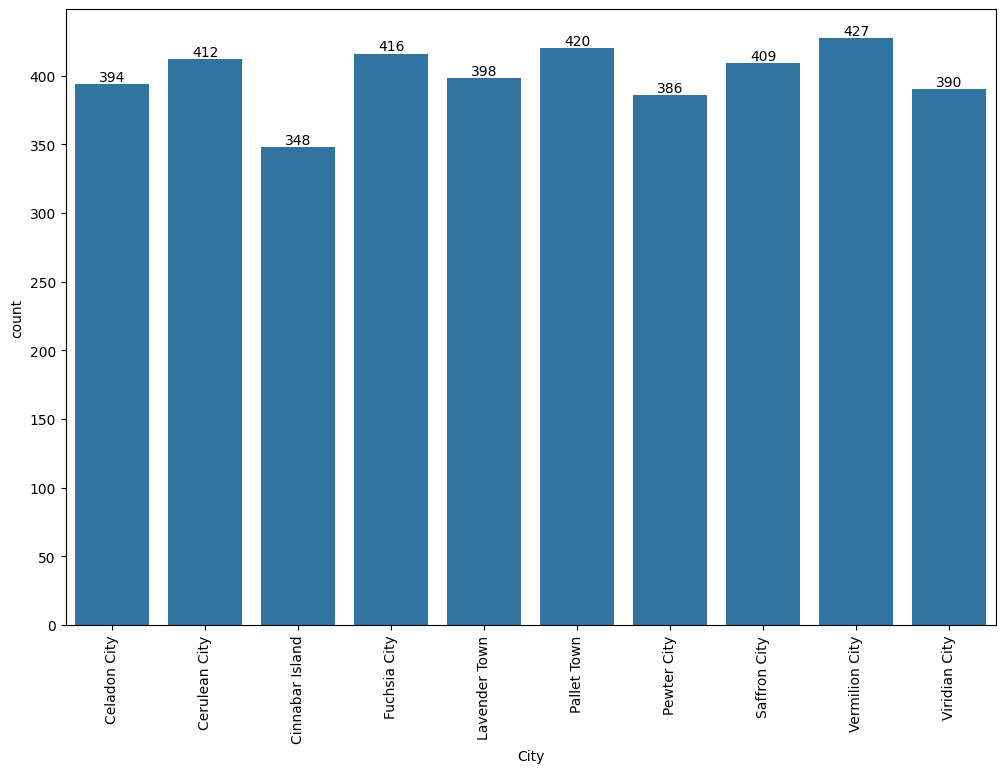

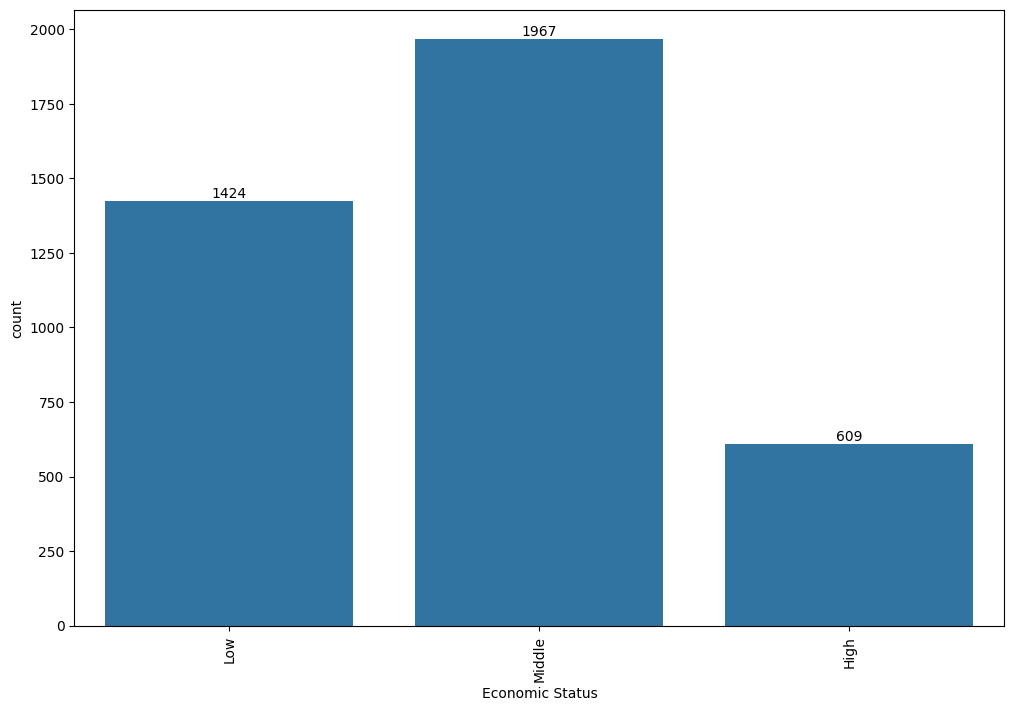

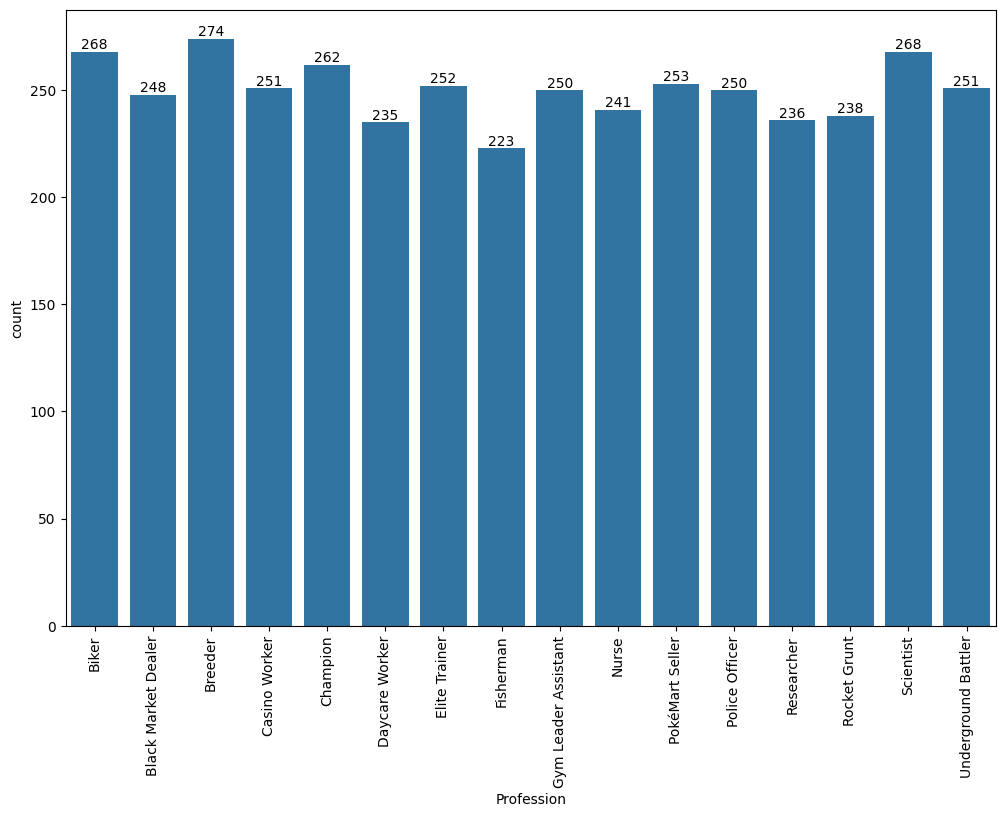

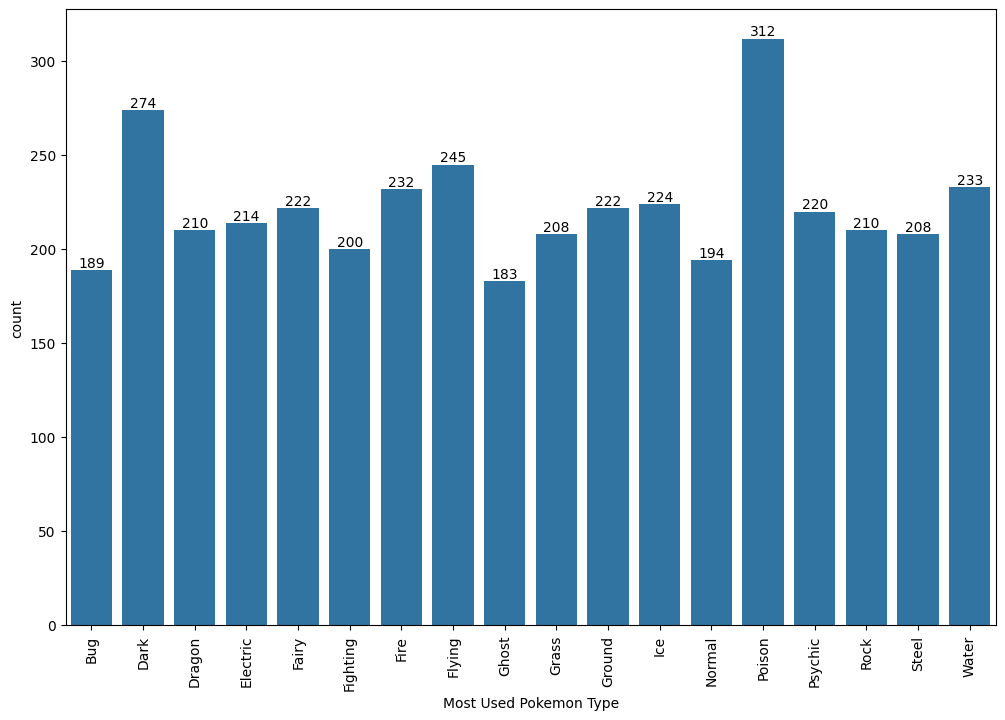

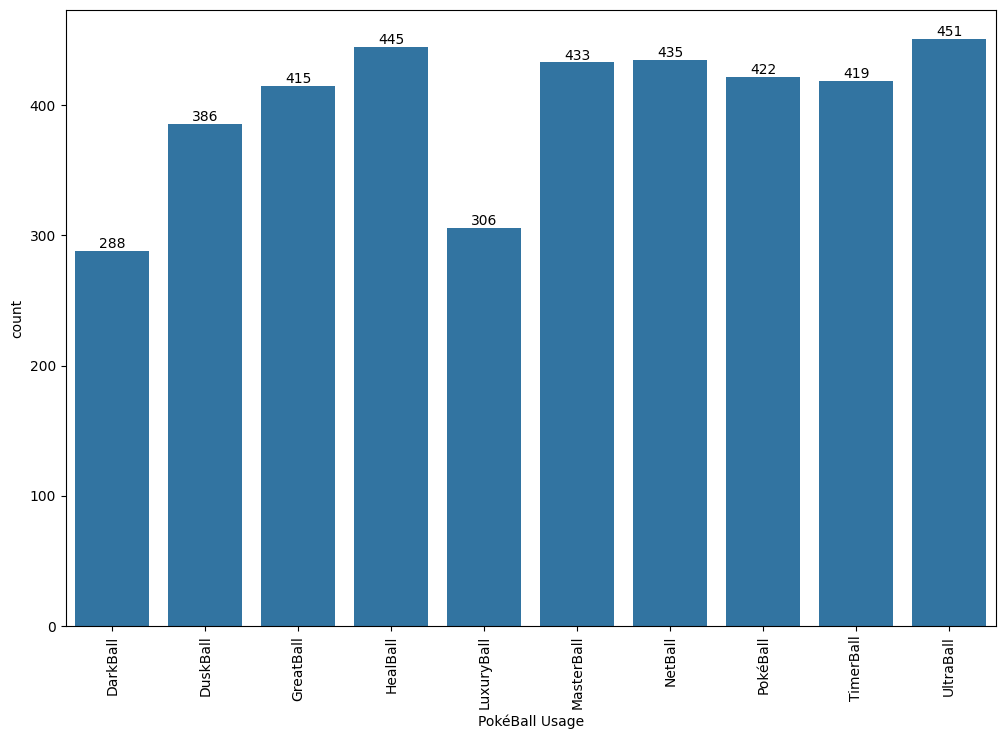

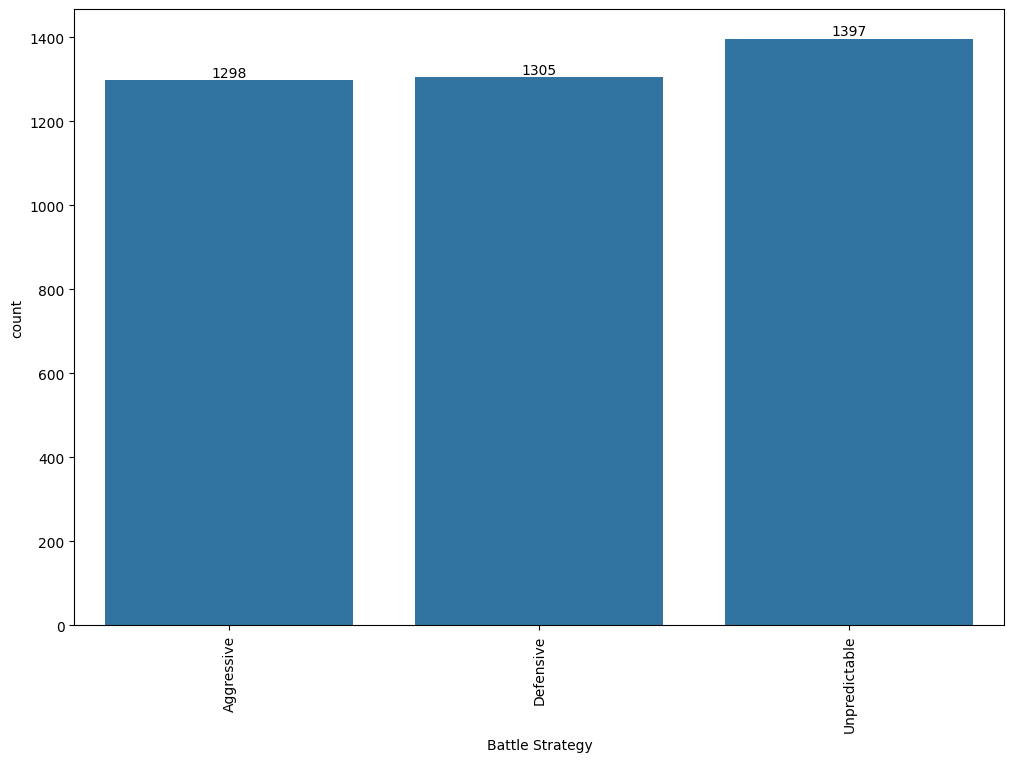

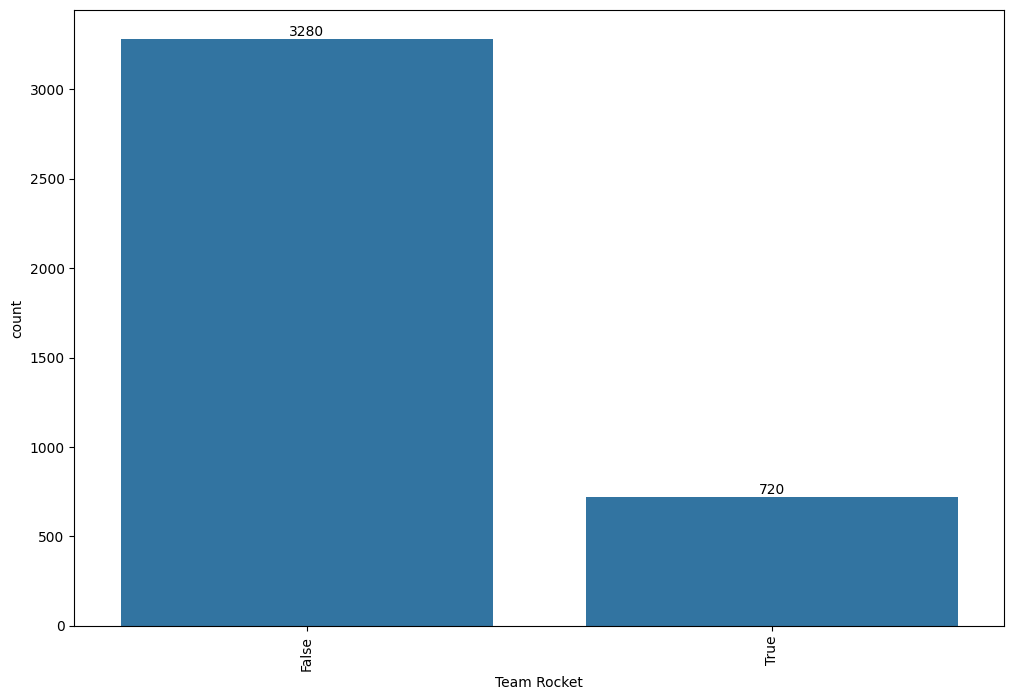

In [ ]:
for variable in qualitative_variables:
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(x=variable, data=df_train)
    plt.xticks(rotation=90)
    add_count_labels(ax)
    plt.show()

#### Variables binaires

In [26]:
binary_variables = df.select_dtypes(include=["bool"]).columns

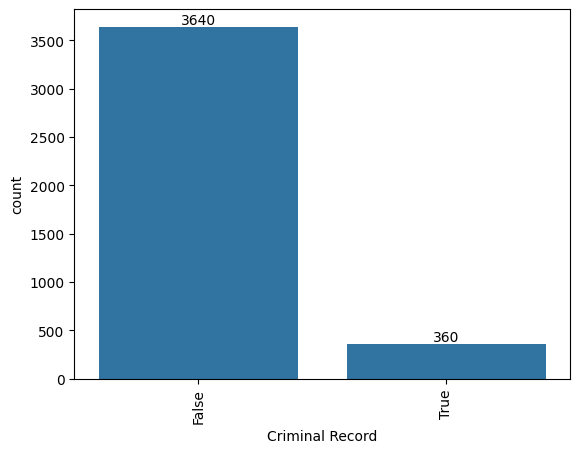

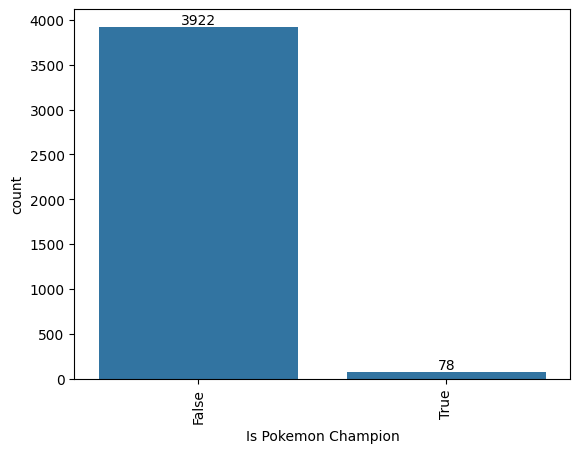

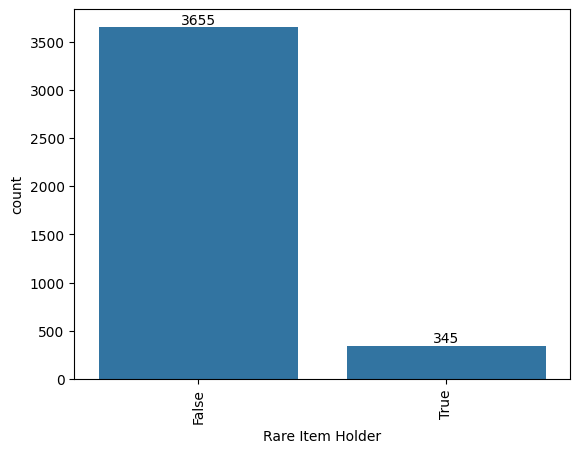

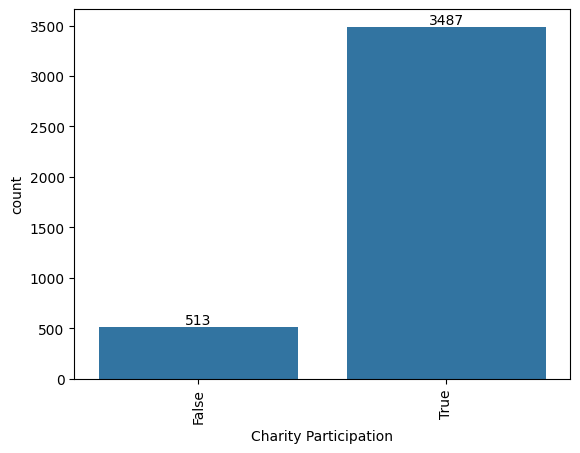

In [27]:
for variable in binary_variables:
    plt.figure()
    ax = sns.countplot(x=variable, data=df_train)
    plt.xticks(rotation=90)
    add_count_labels(ax)
    plt.show()

#### Variables explicatives en fonction de la variable d'intérêt

##### Variables quantitatives

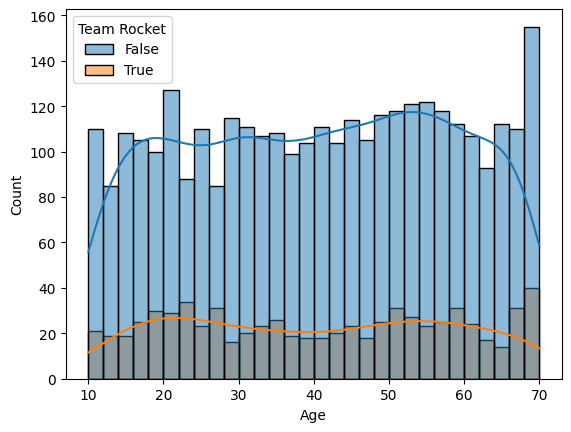

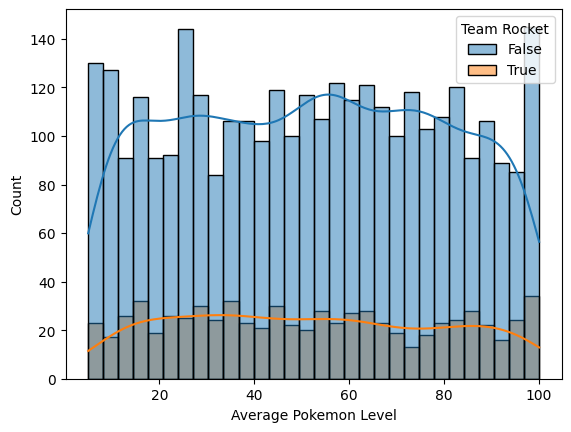

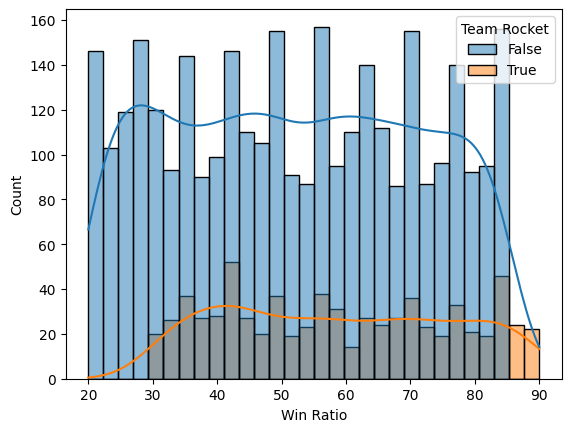

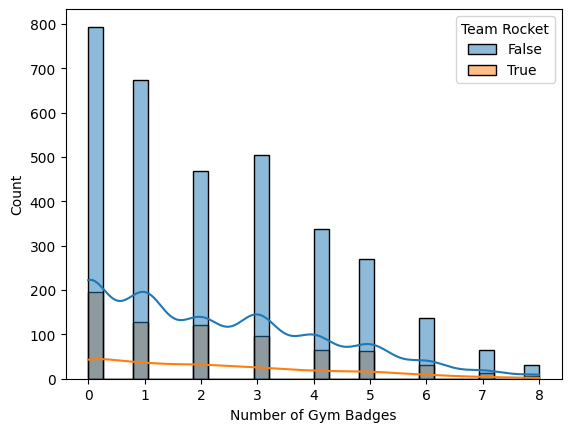

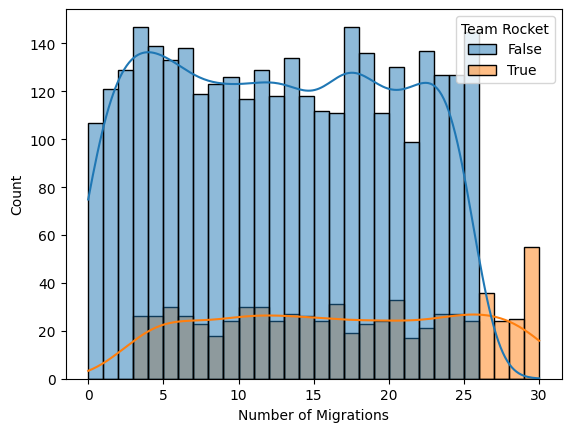

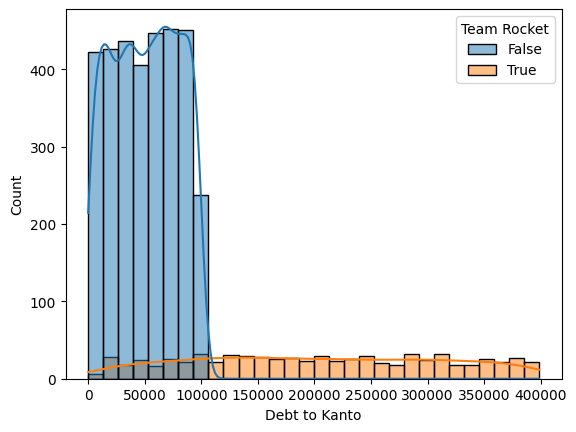

In [28]:
for column in quantitative_variables:
    plt.figure()
    sns.histplot(x=column, hue='Team Rocket', data=df_train, kde=True, bins=30)

##### Variables qualitatives

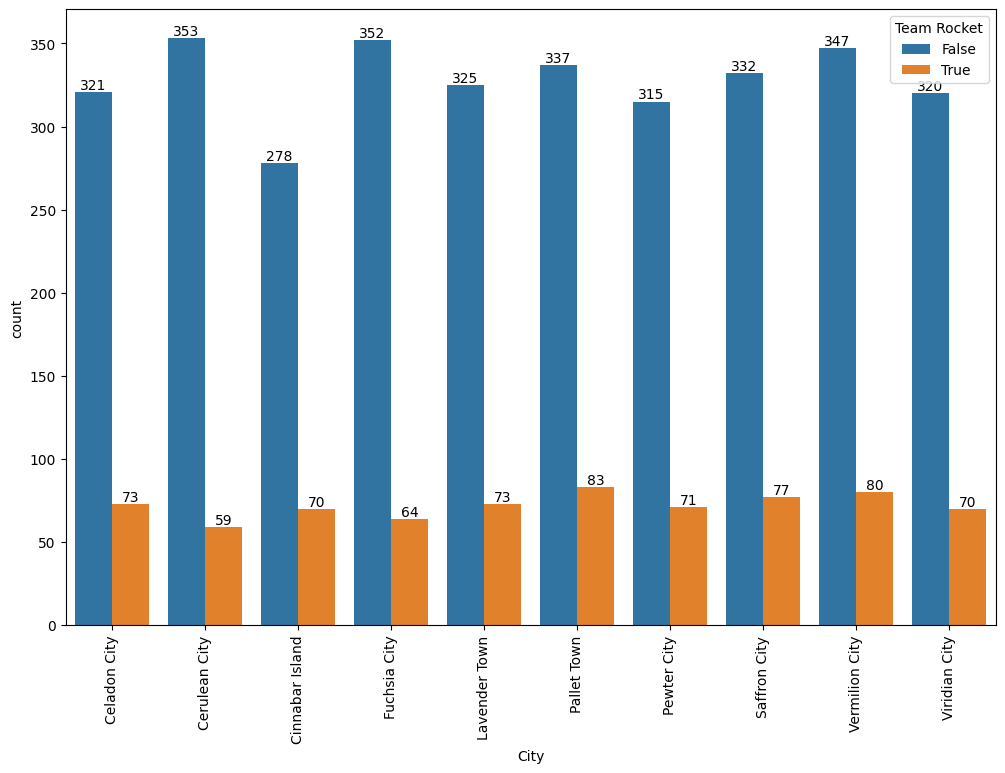

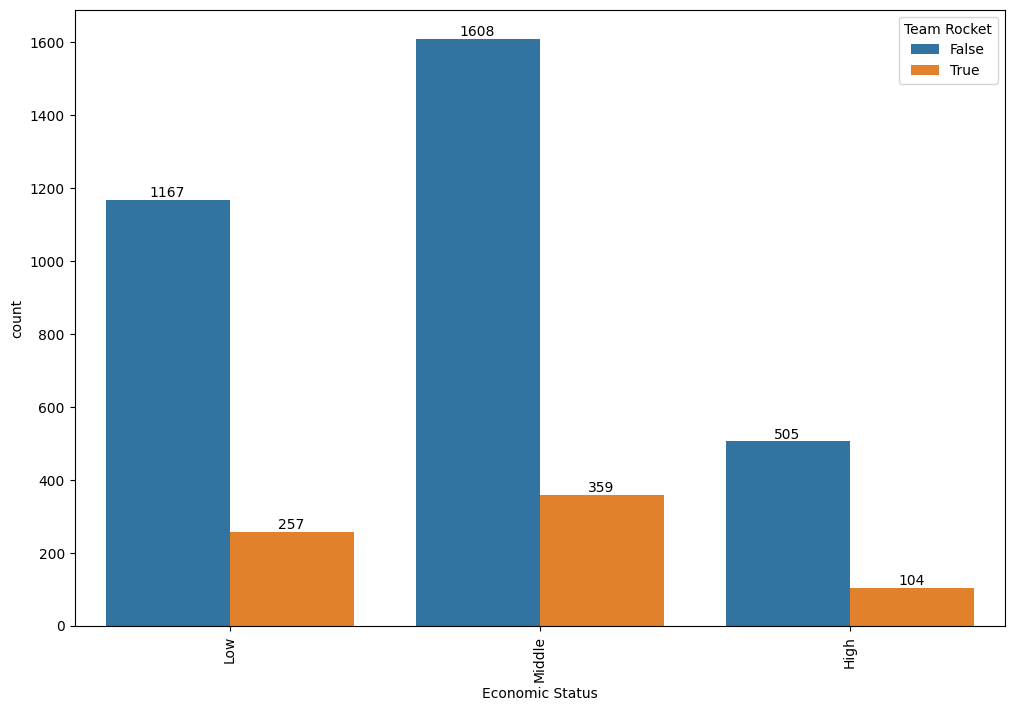

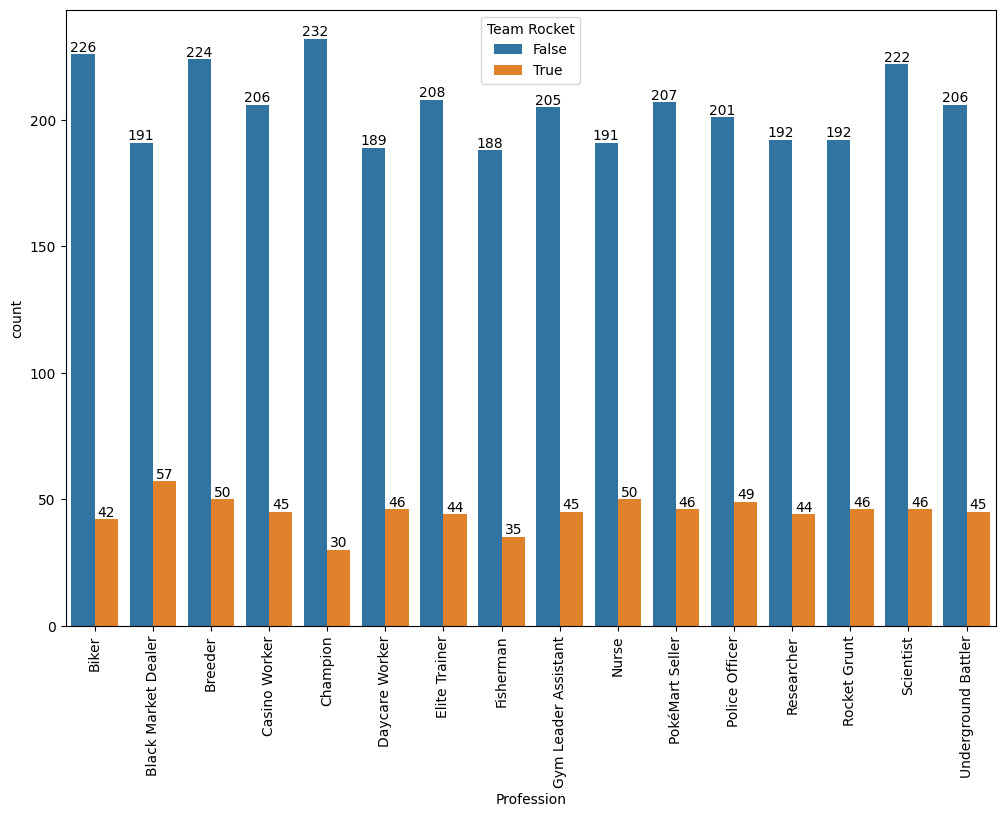

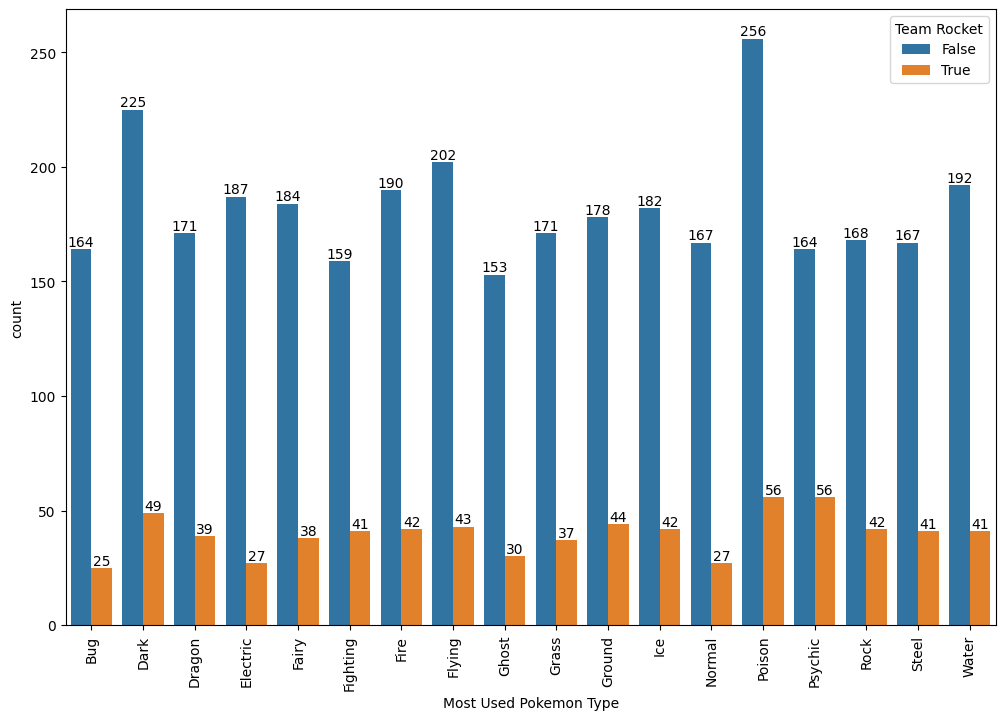

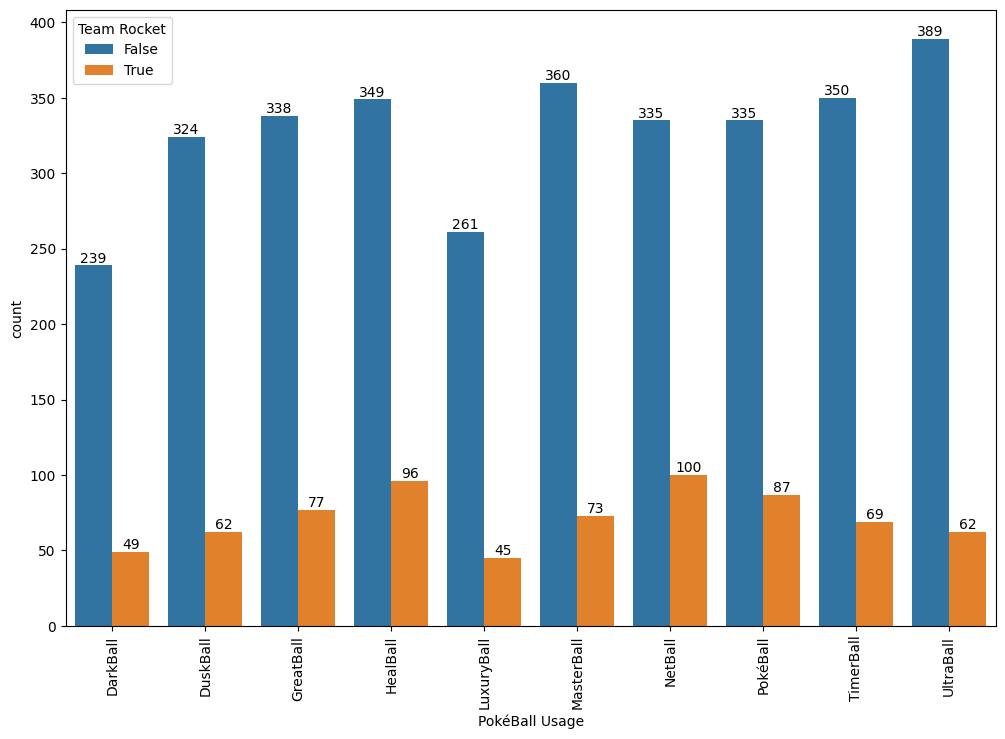

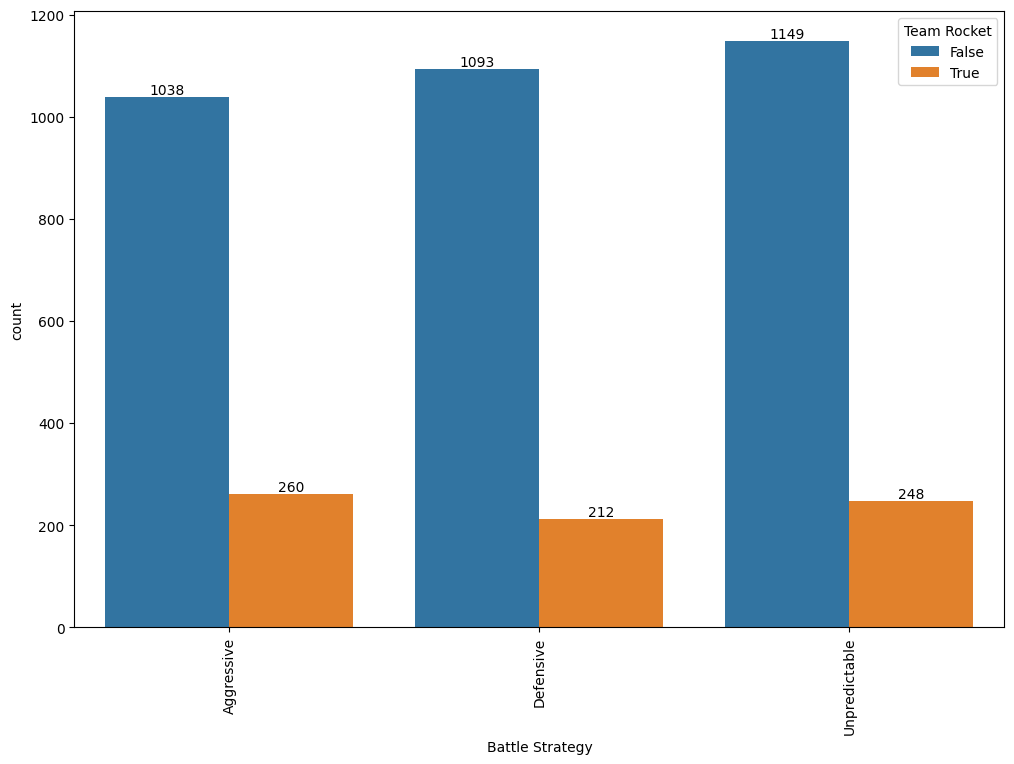

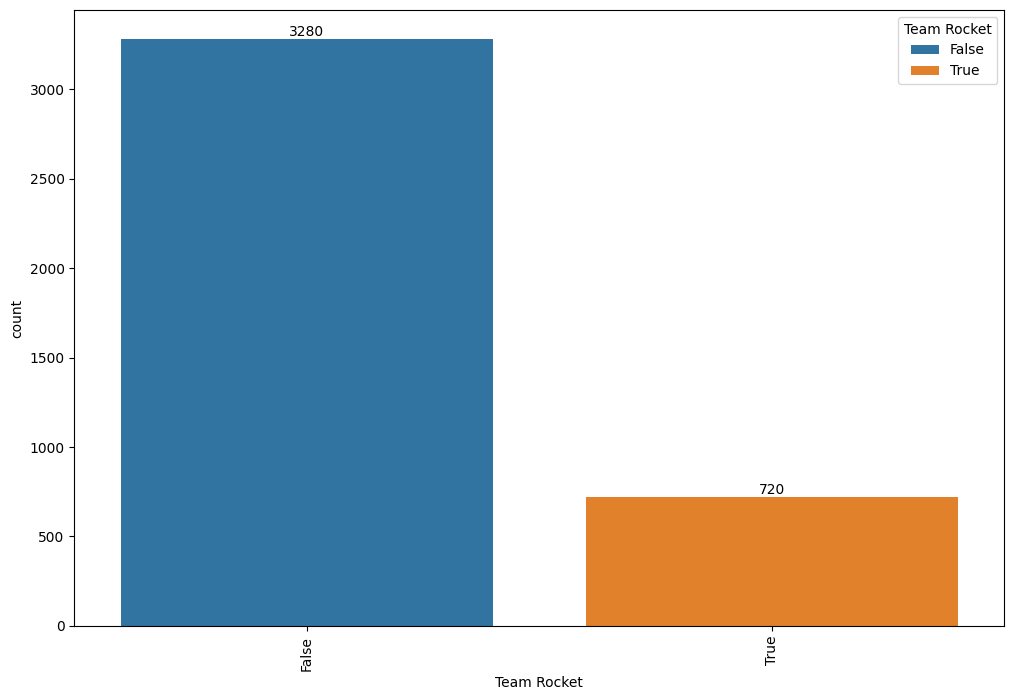

In [35]:
for variable in qualitative_variables:
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(x=variable, hue='Team Rocket', data=df_train)
    plt.xticks(rotation=90)
    add_count_labels(ax)
    plt.show()

##### Variables binaires

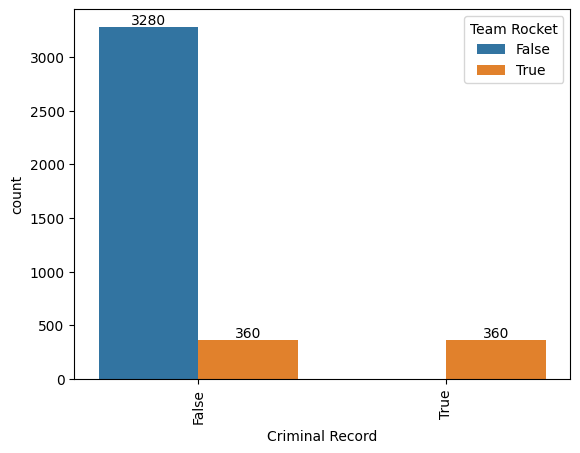

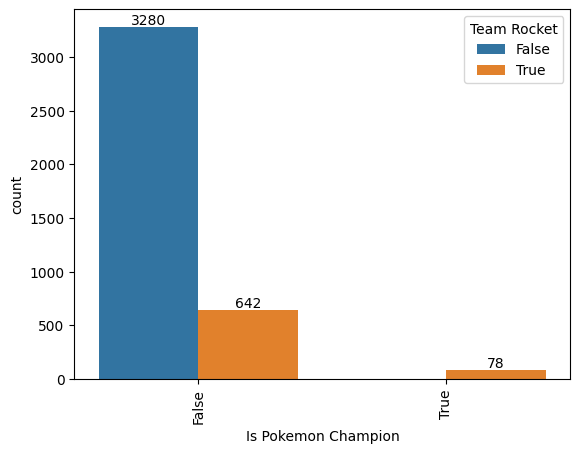

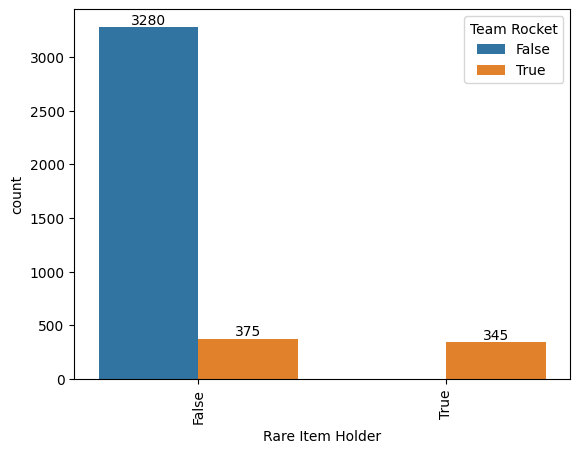

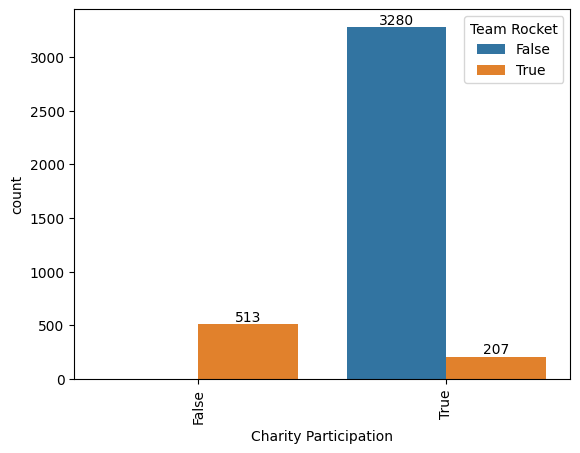

In [32]:
for variable in binary_variables:
    plt.figure()
    ax = sns.countplot(x=variable, hue='Team Rocket', data=df_train)
    plt.xticks(rotation=90)
    add_count_labels(ax)
    plt.show()